In [32]:
# Import the basic Library of python #

import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Load the dataset #

data = pd.read_csv('D:\\ML-Projects\\Linear Regression\\dataset\\USA_Housing.csv')

In [34]:
# Display the first few rows of the dataset #

data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [35]:
# Display the Information about the dataset #

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


#### The dataset having 5000 Rows & 7 Coloumn, all having numerical coloumn except address column.
#### Here’s a brief overview of the columns:
##### 1. Avg. Area Income : It tells the average income in the particular area of house              
##### 2. Avg. Area House Age : It tell the average age of the house
##### 3. Avg. Area Number of Rooms : It tells the average no of room present in house    
##### 4. Avg. Area Number of Bedrooms : It tells the average no of bedroom in the house 
##### 5. Area Population : It tells the area population of USA house              
##### 6. Price : It tells the price the house based on above feature                        
##### 7. Address : It tells the address the USA house


In [36]:
# Display the Statical analysis of the datset #

data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [37]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

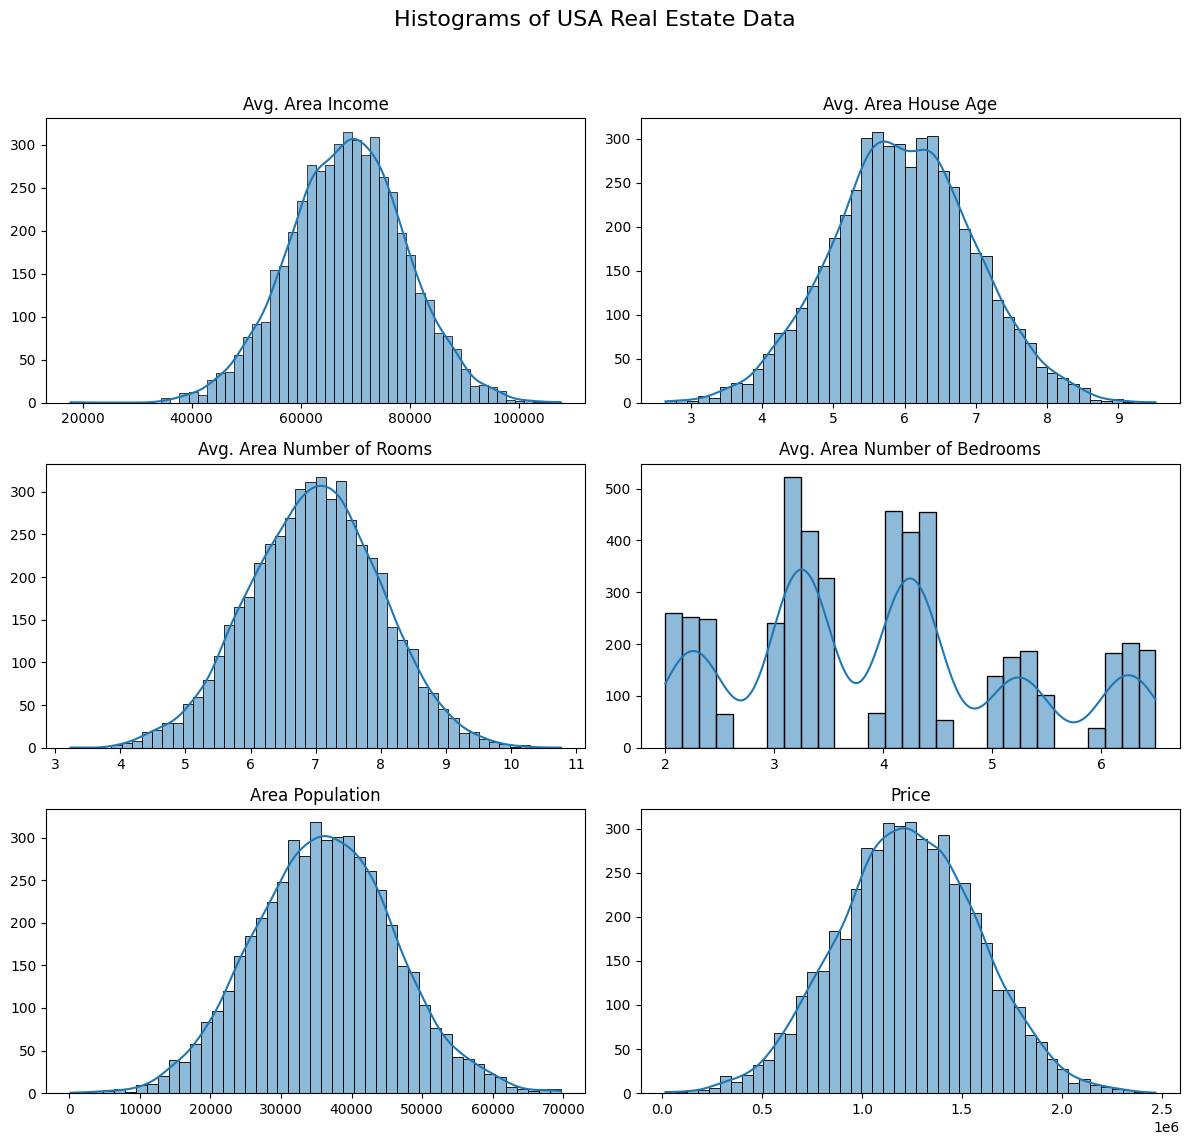

In [38]:
# Create histograms for the numerical columns #

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig.suptitle('Histograms of USA Real Estate Data', fontsize=16)

cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population', 'Price']

for i, col in enumerate(cols):
    sns.histplot(data[col], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### The histograms provide insights into the distribution of each variable:

##### 1. Avg. Area Income : Average area income curv is uniformally distributed range between 40 to 80 thousand.  
##### 2. Avg. Area House Age: Average area of house is also uniformally distributed range between 5 to 7
##### 3. Avg. Area Number of Rooms :Average area is also uniformally distributed
##### 4. Avg. Area Number of Bedrooms: No of bed room indicates most of the house purchesed 3 BHK & 4 BHK & also 2 BHK, but less peaple buy 5 & 6 BKH
##### 5. Area Population : Area population is also uniformally distributed 
##### 6. Price : Price data is also uniformally distributed. 

##### Next, I’ll check scatter plots to explore the relationships between these variables and the house price. It will help us understand which factors might be influencing property prices more significantly.

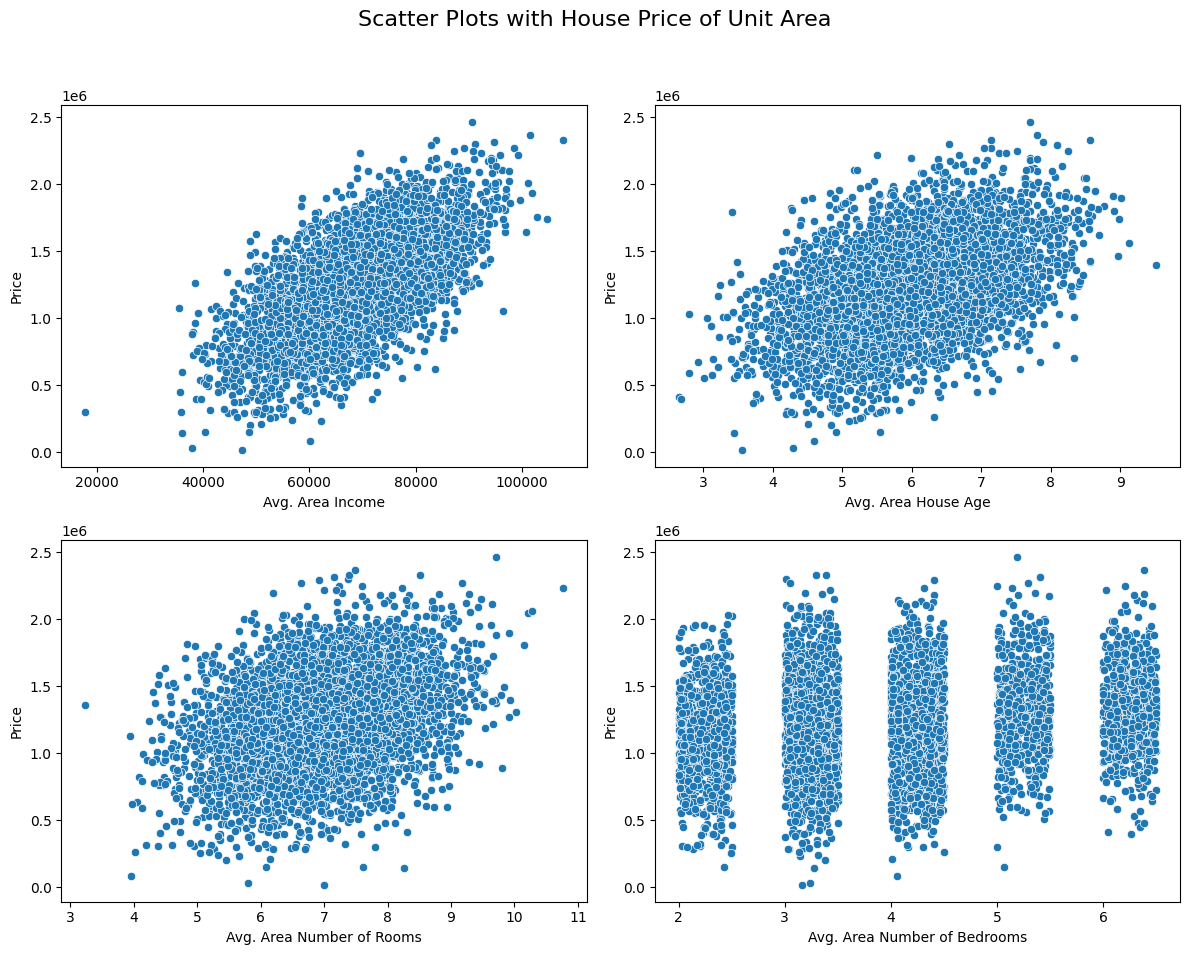

In [39]:
# Scatter plots to observe the relationship with house price

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)

# Scatter plot for each variable against the house price

sns.scatterplot(data=data, x='Avg. Area Income', y='Price', ax=axes[0, 0])
sns.scatterplot(data=data, x='Avg. Area House Age', y='Price', ax=axes[0, 1])
sns.scatterplot(data=data, x='Avg. Area Number of Rooms', y='Price',ax=axes[1, 0])
sns.scatterplot(data=data, x='Avg. Area Number of Bedrooms', y='Price',ax=axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### The Scatter plot provide insights into the distribution of each variable:
##### Average area income & price are linearily related. When income high, price is also get high.    Average house age & No of rooms are linearily related with price, When these variable value goes high , Price is also goes high.   Average area No of bed room having no any relation with price. 


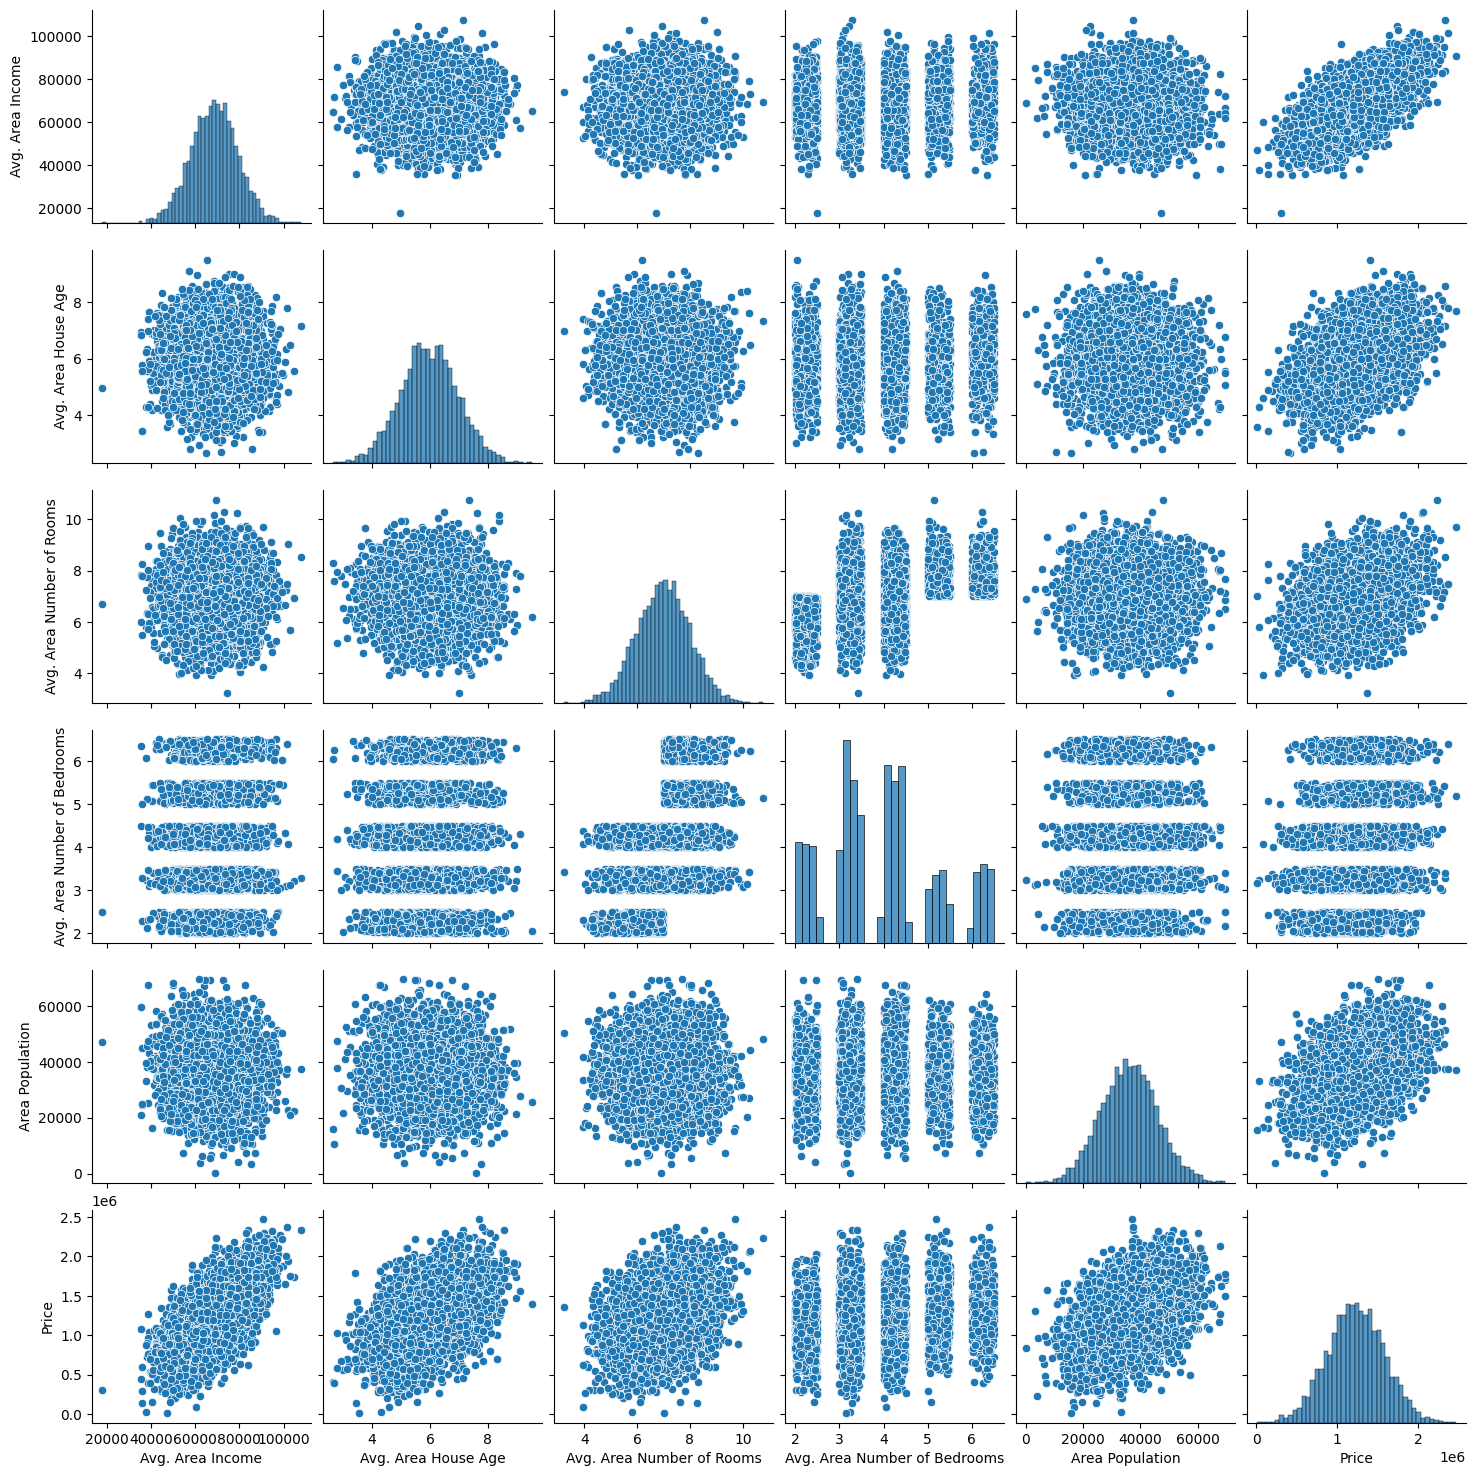

In [40]:
# Bivariate Analysis

sns.pairplot(data)
plt.show()

#### Pair plot provide insights into the distribution of each variable:
##### Average area income & price are linearily related. When income high, price is also get high.    Average house age, & No of rooms & area population are linearily related with price, When these variable value goes high ,Price of the house is also goes high.   Average area No of bed room having no any relation with price. 

#### Finally, it would be beneficial to perform a correlation analysis to quantify the relationships between these variables, especially how each one correlates with the house price:

In [41]:
# Address is non significant in our dataset, so we will remove this varible.

data = data.drop(('Address'), axis=1)
data.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06


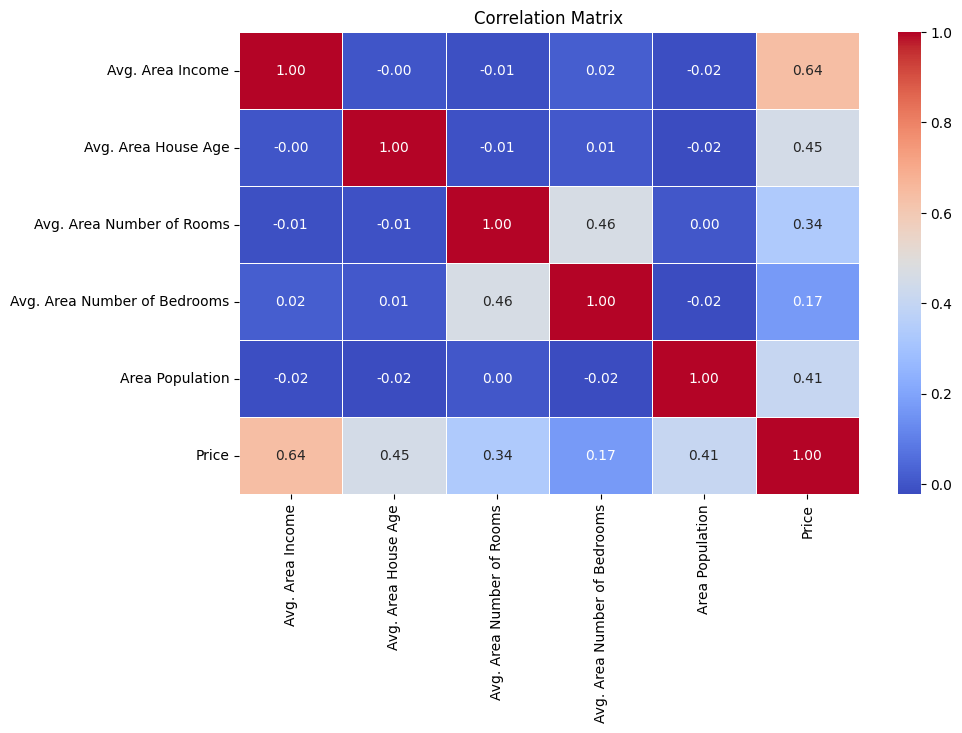

                              Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area

In [42]:
# Correlation matrix
correlation_matrix = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f", linewidths=.4)
plt.title('Correlation Matrix')
plt.show()

print(correlation_matrix)

#### The correlation matrix provides quantified insights into how each variable is related to the others, especially with respect to the house price:

##### 1. Avg. Area Income : This shows that positive correlation with house price (0.63), not a very strong positive correlation.
##### 2. Avg. Area House Age  : This shows that only positive correlation with house price (0.45)
##### 3. Avg. Area Number of Rooms : This shows a week positive correlation with price(0.33)
##### 4. Avg. Area Number of Bedrooms : week positive correlation with price(0.17)
##### 5. Area Population : week positive correlation with price(0.17)
##### Not any single variable which having strong positive correlation that can decide the price of house also there is no any multi coliniarity.

### Data pre-processing #

In [43]:
# 1. Missing data checking

data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

### There are no null values in the dataset
### Now Checking the outliers present in dataset

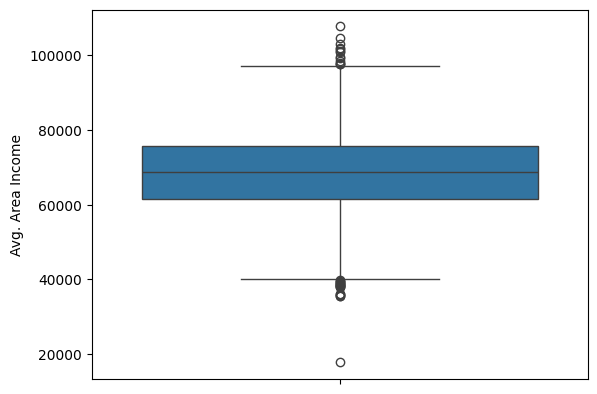

In [44]:
sns.boxplot(y='Avg. Area Income', data = data)
plt.show()

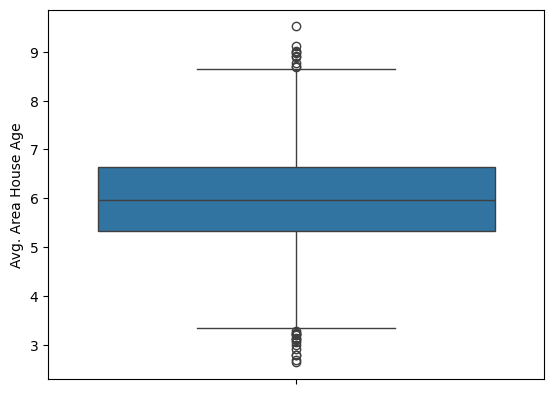

In [45]:
sns.boxplot(y='Avg. Area House Age', data = data)
plt.show()

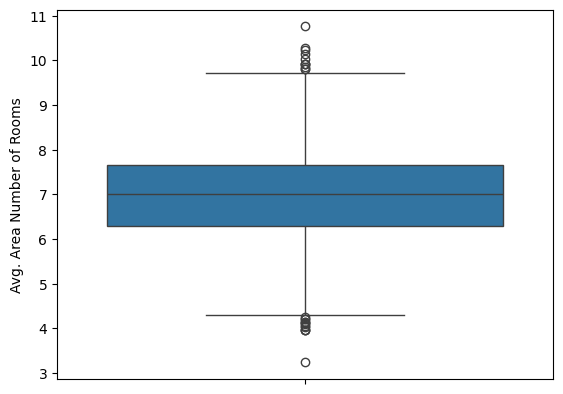

In [46]:
sns.boxplot(y='Avg. Area Number of Rooms', data = data)
plt.show()

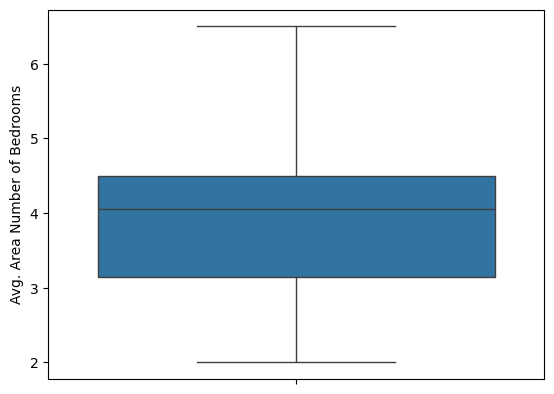

In [47]:
sns.boxplot(y='Avg. Area Number of Bedrooms', data = data)
plt.show()

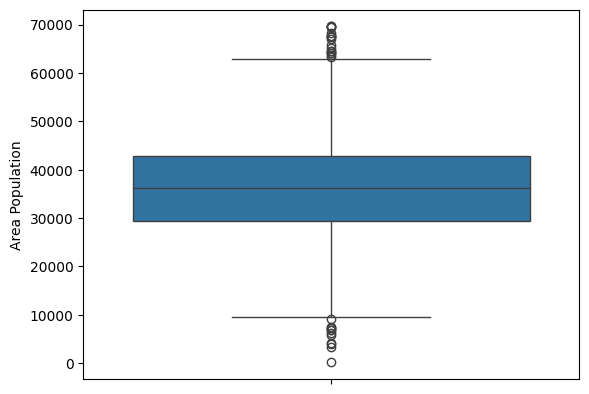

In [48]:
sns.boxplot(y='Area Population', data = data)
plt.show()

#### Handling the outliers in datset


In [50]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
Positive_outlier = Q3 + 1.5*IQR
Negative_outlier = Q1 - 1.5*IQR


In [51]:
print(Q1)
print('*****************************')
print(Q3)
print('*****************************')
print(IQR)
print('*****************************')
print(Positive_outlier)
print('*****************************')
print(Negative_outlier)
print('*****************************')


Avg. Area Income                 61480.562388
Avg. Area House Age                  5.322283
Avg. Area Number of Rooms            6.299250
Avg. Area Number of Bedrooms         3.140000
Area Population                  29403.928702
Price                           997577.135049
Name: 0.25, dtype: float64
*****************************
Avg. Area Income                7.578334e+04
Avg. Area House Age             6.650808e+00
Avg. Area Number of Rooms       7.665871e+00
Avg. Area Number of Bedrooms    4.490000e+00
Area Population                 4.286129e+04
Price                           1.471210e+06
Name: 0.75, dtype: float64
*****************************
Avg. Area Income                 14302.776278
Avg. Area House Age                  1.328525
Avg. Area Number of Rooms            1.366621
Avg. Area Number of Bedrooms         1.350000
Area Population                  13457.362067
Price                           473633.069163
dtype: float64
*****************************
Avg. Area Income   

In [52]:
data = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]

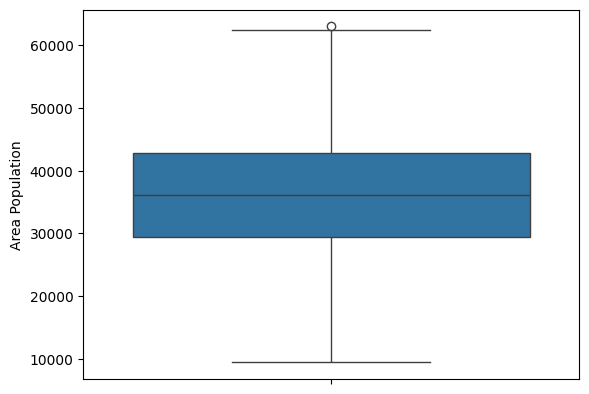

In [53]:
sns.boxplot(y='Area Population', data = data)
plt.show()

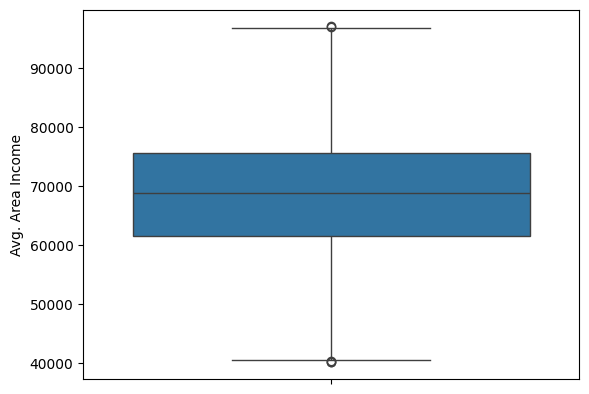

In [54]:
sns.boxplot(y='Avg. Area Income', data = data)
plt.show()

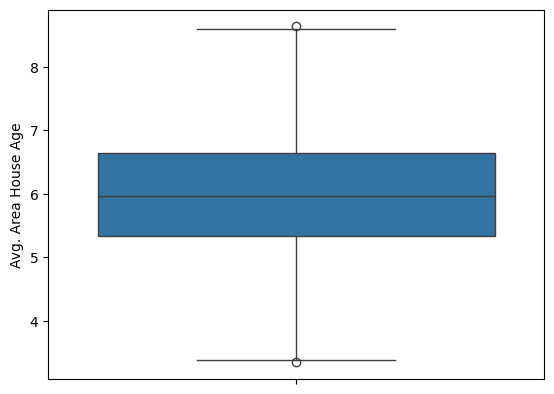

In [55]:
sns.boxplot(y='Avg. Area House Age', data = data)
plt.show()

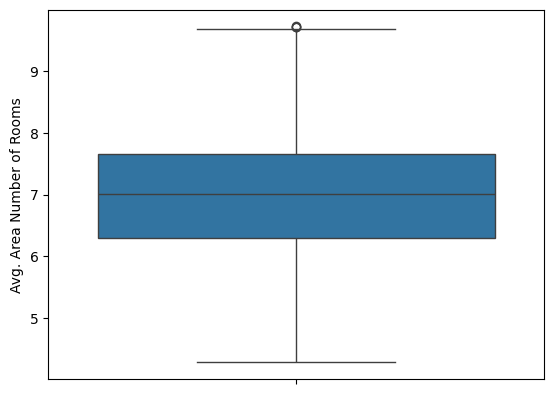

In [56]:
sns.boxplot(y='Avg. Area Number of Rooms', data = data)
plt.show()

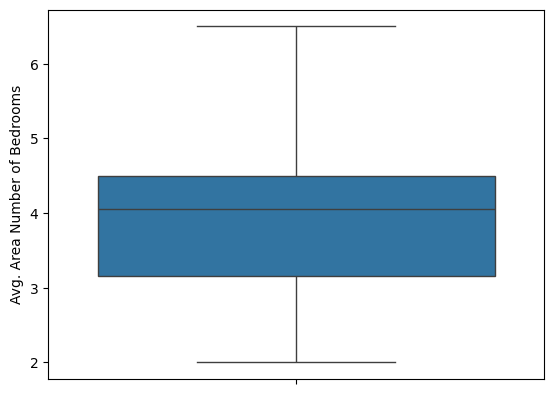

In [57]:
sns.boxplot(y='Avg. Area Number of Bedrooms', data = data)
plt.show()

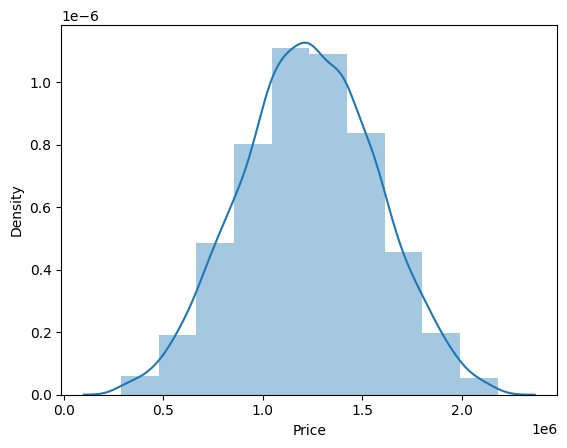

In [58]:
# Univariate analysis

sns.distplot(data['Price'],bins=10)
plt.show()

### Split the data into dependent & independent variable for feature scaling#

In [59]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [60]:
x.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174


In [61]:
y.head(2)

0    1.059034e+06
1    1.505891e+06
Name: Price, dtype: float64

### Feature Scaling #

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[ 1.06071779, -0.30363229,  0.02290907,  0.0859644 , -1.35240284],
       [ 1.03191461,  0.02775903, -0.25978767, -0.72371729,  0.4207993 ],
       [-0.7110857 , -0.11411114,  1.5498338 ,  0.92803335,  0.07927052],
       ...,
       [-0.50694938,  1.31970959, -2.2154799 , -1.50101171, -0.29599705],
       [-0.05953013, -0.45737203,  0.14574608,  1.17903467,  0.67532313],
       [-0.30123371,  0.0167887 , -0.1973158 ,  0.06977076,  1.07753698]])

### Variance inflation factor(VIF) checking to know the multicollinearity between independent & dependent variable

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_scaler
vif = pd.DataFrame()
vif['Variance inflation factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = x.columns
vif

,Variance inflation factor,Features
0,1.001776,Avg. Area Income
1,1.001451,Avg. Area House Age
2,1.280194,Avg. Area Number of Rooms
3,1.280126,Avg. Area Number of Bedrooms
4,1.001448,Area Population


### Spliting the data into train for building the model & test for model evaluation & prediction.

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x_scaler,y,test_size=0.3,random_state=142)

In [65]:
# Shape of the data
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3405, 5) (1460, 5) (3405,) (1460,)


### Building Linear Regression model

In [66]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression() 
linear_model.fit(x_train,y_train)

LinearRegression()

### Predict the with test data

In [67]:
y_pred = linear_model.predict(x_test)
y_pred

array([1329921.66674312, 1280162.1650318 ,  531577.64189539, ...,
       1174651.03484937, 1396421.20820338, 1501216.10676149])

### Evaluation matrix to find the accuracy

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9076447738355076

### OLS( Ordinary Least Square) Method

In [69]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1,y_test1 = train_test_split(x,y,test_size=0.3,random_state=141)

In [70]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf

In [71]:
reg_model = smf.OLS(endog= y_train1,exog= x_train1).fit()

In [72]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          1.998e+04
Date:                Thu, 17 Oct 2024   Prob (F-statistic):                        0.00
Time:                        20:09:37   Log-Likelihood:                         -46888.
No. Observations:                3405   AIC:                                  9.379e+04
Df Residuals:                    3400   BIC:                                  9.382e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                10.2910      0.319     32.227      0.000       9.665      10.917
Avg. Area House Age           5.097e+04   3509.492     14.524      0.000    4.41e+04    5.79e+04
Avg. Area Number of Rooms    -1.146e+04   3907.465     -2.934      0.003   -1.91e+04   -3801.734
Avg. Area Number of Bedrooms  7722.5522   3614.973      2.136      0.033     634.813    1.48e+04
Area Population                  7.9138      0.389     20.326      0.000       7.150       8.677
==============================================================================
Omnibus:                       12.253   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.551
Skew:                          -0.014   Prob(JB):                      0.00843
Kurtosis:                       2.742   Cond. No.                     9.50e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking the normality

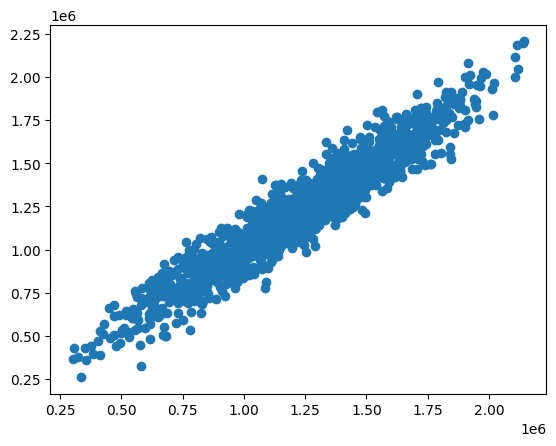

In [73]:
plt.scatter(y_test, y_pred)
plt.show()

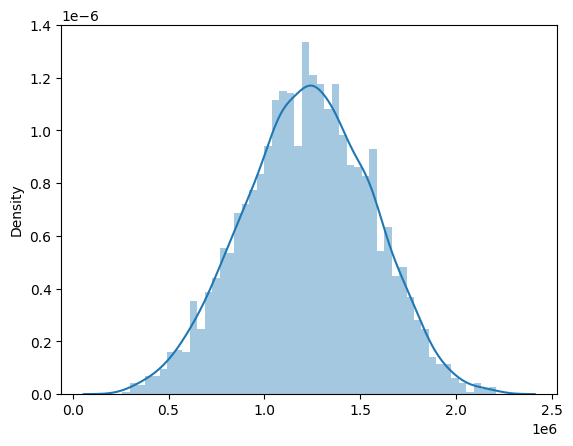

In [74]:
sns.distplot((y_test,y_pred), bins=50)
plt.show()

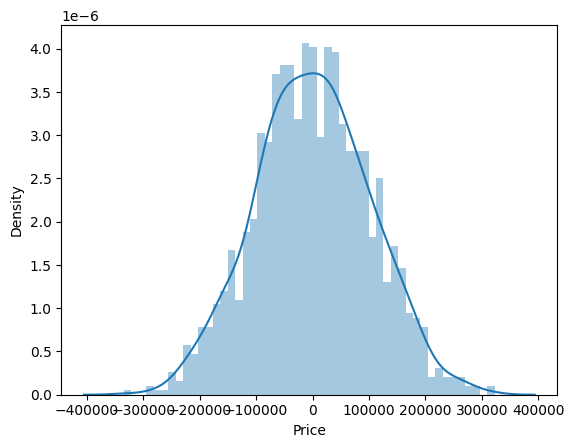

In [75]:
# Residual plot

sns.distplot((y_test - y_pred), bins=50)
plt.show()

### Regularisation method to findout overfitting or underfitting,                               Ridge, Lasso, Elasticnet(Ridge+Lasso)

In [76]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

### Ridge Method

In [77]:
ridge_regr = Ridge(alpha=0.1)
ridge_regr.fit(x_train,y_train)
y_reg_pred = ridge_regr.predict(x_test)
r2_score(y_test, y_reg_pred)

0.9076454040673516

### Lasso Method

In [78]:
lasso_regr = Lasso(alpha=0.1)
lasso_regr.fit(x_train,y_train)
y_lasso_pred = lasso_regr.predict(x_test)
r2_score(y_test, y_lasso_pred)

0.9076447941154511

### Elasticnet Method

In [79]:
elestic_regr = ElasticNet(alpha=0.1,l1_ratio=0.5)
elestic_regr.fit(x_train,y_train)
y_elestic_pred = elestic_regr.predict(x_test)
r2_score(y_test, y_elestic_pred)

0.9062972422041476

### Linear Regression Method

In [80]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_linear_pred = linear_model.predict(x_test)
r2_score(y_test, y_linear_pred)

0.9076447738355076

#### Assumption 
##### 1. Adj. R-squared (uncentered):	0.967
##### 2. P_Value : All are significant
##### 3. Durbin-Watson:	2.055 ( No autocorrelation)
##### 4. VIF = All veriable are less then 5, means there is no multicoliniarity
##### 5. Data are uniform & normaly diatributed.
##### 6. There is no endoginity problem
##### 7. There is no hetroscadiscity 
## Summery
##### Real Estate Price Prediction is the process of estimating or forecasting the future prices of real estate properties, such as houses, apartments, or commercial buildings. The goal is to provide accurate property rates to buyers, sellers, investors, and real estate professionals to make informed decisions about real estate transactions